### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("Stocks.csv")

In [3]:
df

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305
...,...,...,...,...,...,...,...,...,...,...,...
11575,-0.412598,-0.348853,0.080220,0.140919,0.264325,-0.202208,0.158703,0.270115,0.021023,-0.217680,-0.075896
11576,-0.153805,-0.140625,0.045124,0.318033,0.035736,0.134977,-0.056807,-0.029158,0.201563,-0.095903,0.263347
11577,-0.138686,-0.192090,0.229242,0.183735,0.232877,-0.029940,0.011213,-0.078140,0.141304,-0.153042,-0.004435
11578,-0.134111,-0.117148,0.705426,0.025229,0.258542,-0.011786,0.049180,-0.050687,0.034111,-0.226003,0.052995


In [4]:
X = df.iloc[:,0:11]

In [5]:
scalar = StandardScaler()

In [6]:
X_scaled =  scalar.fit_transform(X)

In [7]:
X_scaled

array([[ 0.40267501,  0.39098215,  0.08584079, ..., -0.03876745,
        -1.01974525, -0.23263258],
       [-0.1379494 ,  0.58085103,  0.79947587, ..., -3.85318102,
        -1.5543428 , -1.02878282],
       [ 0.20777089,  0.23078629,  0.12870816, ...,  0.10034237,
         0.49027408, -0.44883635],
       ...,
       [-0.89544636, -0.97665415,  1.33045317, ...,  1.06352668,
        -0.90421538, -0.10009367],
       [-0.86837105, -0.57991271,  4.34962273, ...,  0.33285807,
        -1.31994384,  0.26322111],
       [ 8.42239827, -1.20381465, -0.38357908, ...,  1.65258761,
        -0.15755182, -0.33291457]])

### K-Means Clustering

In [8]:
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

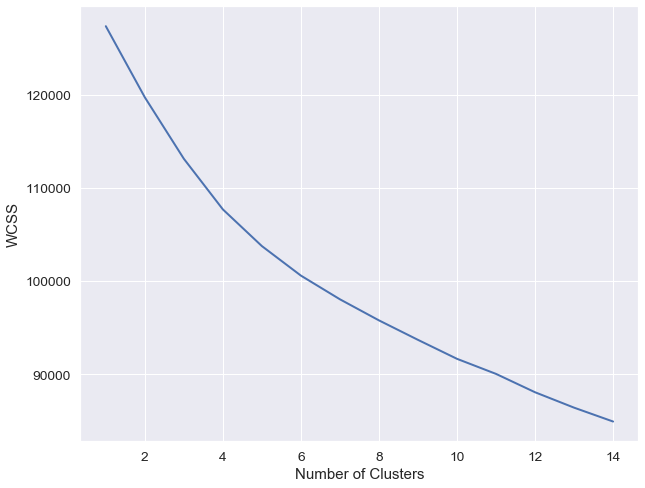

In [9]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [10]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [11]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [12]:
df_segm_kmeans = df.copy()

In [13]:
df_segm_kmeans

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305
...,...,...,...,...,...,...,...,...,...,...,...
11575,-0.412598,-0.348853,0.080220,0.140919,0.264325,-0.202208,0.158703,0.270115,0.021023,-0.217680,-0.075896
11576,-0.153805,-0.140625,0.045124,0.318033,0.035736,0.134977,-0.056807,-0.029158,0.201563,-0.095903,0.263347
11577,-0.138686,-0.192090,0.229242,0.183735,0.232877,-0.029940,0.011213,-0.078140,0.141304,-0.153042,-0.004435
11578,-0.134111,-0.117148,0.705426,0.025229,0.258542,-0.011786,0.049180,-0.050687,0.034111,-0.226003,0.052995


In [14]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [15]:
df_segm_kmeans

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,Segment K-Means
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385,0
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235,0
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561,0
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512,0
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11575,-0.412598,-0.348853,0.080220,0.140919,0.264325,-0.202208,0.158703,0.270115,0.021023,-0.217680,-0.075896,0
11576,-0.153805,-0.140625,0.045124,0.318033,0.035736,0.134977,-0.056807,-0.029158,0.201563,-0.095903,0.263347,0
11577,-0.138686,-0.192090,0.229242,0.183735,0.232877,-0.029940,0.011213,-0.078140,0.141304,-0.153042,-0.004435,0
11578,-0.134111,-0.117148,0.705426,0.025229,0.258542,-0.011786,0.049180,-0.050687,0.034111,-0.226003,0.052995,0


In [16]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [17]:
df_segm_analysis

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov
Segment K-Means,,,,,,,,,,,
0,-0.024217,-0.013741,0.026188,0.025527,0.030909,-0.005555,0.027664,0.020449,0.005329,-0.023476,-0.011823
1,0.141074,-0.065897,0.015682,0.055355,0.022235,-0.002773,-0.085333,-0.025906,-0.087306,0.143894,0.138577
2,0.139484,0.505993,-0.127144,-0.133703,-0.114033,0.346941,-0.065672,0.170215,-0.067074,-0.121009,-0.194785


In [18]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','ReturnJan']].groupby(['Segment K-Means']).count()

In [19]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [20]:
df_segm_analysis

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,,,,
0,-0.024217,-0.013741,0.026188,0.025527,0.030909,-0.005555,0.027664,0.020449,0.005329,-0.023476,-0.011823,8995,0.776770
1,0.141074,-0.065897,0.015682,0.055355,0.022235,-0.002773,-0.085333,-0.025906,-0.087306,0.143894,0.138577,2225,0.192142
2,0.139484,0.505993,-0.127144,-0.133703,-0.114033,0.346941,-0.065672,0.170215,-0.067074,-0.121009,-0.194785,360,0.031088


In [21]:
df_segm_analysis.rename({0: 'stocksTrain1',
                         1: 'stocksTrain2',
                         2: 'stocksTrain3',
                         },inplace=True)

In [22]:
df_segm_analysis

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,,,,
stocksTrain1,-0.024217,-0.013741,0.026188,0.025527,0.030909,-0.005555,0.027664,0.020449,0.005329,-0.023476,-0.011823,8995,0.776770
stocksTrain2,0.141074,-0.065897,0.015682,0.055355,0.022235,-0.002773,-0.085333,-0.025906,-0.087306,0.143894,0.138577,2225,0.192142
stocksTrain3,0.139484,0.505993,-0.127144,-0.133703,-0.114033,0.346941,-0.065672,0.170215,-0.067074,-0.121009,-0.194785,360,0.031088


In [23]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'stocksTrain1',
                         1: 'stocksTrain2',
                         2: 'stocksTrain3'})

In [24]:
df_segm_kmeans

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,Segment K-Means,Labels
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385,0,stocksTrain1
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235,0,stocksTrain1
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561,0,stocksTrain1
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512,0,stocksTrain1
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305,0,stocksTrain1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,-0.412598,-0.348853,0.080220,0.140919,0.264325,-0.202208,0.158703,0.270115,0.021023,-0.217680,-0.075896,0,stocksTrain1
11576,-0.153805,-0.140625,0.045124,0.318033,0.035736,0.134977,-0.056807,-0.029158,0.201563,-0.095903,0.263347,0,stocksTrain1
11577,-0.138686,-0.192090,0.229242,0.183735,0.232877,-0.029940,0.011213,-0.078140,0.141304,-0.153042,-0.004435,0,stocksTrain1
11578,-0.134111,-0.117148,0.705426,0.025229,0.258542,-0.011786,0.049180,-0.050687,0.034111,-0.226003,0.052995,0,stocksTrain1


### Plot the clusters

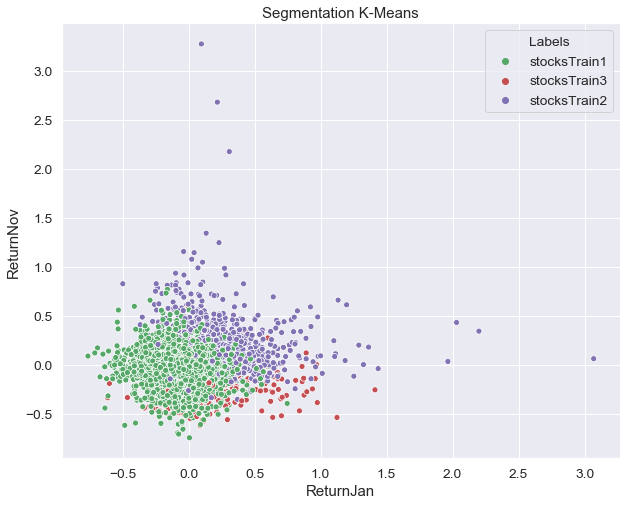

In [25]:
x_axis = df_segm_kmeans['ReturnJan']
y_axis = df_segm_kmeans['ReturnNov']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','m'])
plt.title('Segmentation K-Means')
plt.show()

### Build data frames stocksTrain1, stocksTrain2, and stocksTrain3

In [26]:
df = df_segm_kmeans

In [27]:
df

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,Segment K-Means,Labels
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385,0,stocksTrain1
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235,0,stocksTrain1
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561,0,stocksTrain1
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512,0,stocksTrain1
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305,0,stocksTrain1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,-0.412598,-0.348853,0.080220,0.140919,0.264325,-0.202208,0.158703,0.270115,0.021023,-0.217680,-0.075896,0,stocksTrain1
11576,-0.153805,-0.140625,0.045124,0.318033,0.035736,0.134977,-0.056807,-0.029158,0.201563,-0.095903,0.263347,0,stocksTrain1
11577,-0.138686,-0.192090,0.229242,0.183735,0.232877,-0.029940,0.011213,-0.078140,0.141304,-0.153042,-0.004435,0,stocksTrain1
11578,-0.134111,-0.117148,0.705426,0.025229,0.258542,-0.011786,0.049180,-0.050687,0.034111,-0.226003,0.052995,0,stocksTrain1


In [28]:
train1 = df[df['Labels']=='stocksTrain1']

In [29]:
train1

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,Segment K-Means,Labels
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385,0,stocksTrain1
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235,0,stocksTrain1
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561,0,stocksTrain1
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512,0,stocksTrain1
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305,0,stocksTrain1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11574,-0.173410,-0.276106,0.141791,0.115556,0.109890,-0.096899,0.338983,0.053375,0.021084,0.020679,-0.059163,0,stocksTrain1
11575,-0.412598,-0.348853,0.080220,0.140919,0.264325,-0.202208,0.158703,0.270115,0.021023,-0.217680,-0.075896,0,stocksTrain1
11576,-0.153805,-0.140625,0.045124,0.318033,0.035736,0.134977,-0.056807,-0.029158,0.201563,-0.095903,0.263347,0,stocksTrain1
11577,-0.138686,-0.192090,0.229242,0.183735,0.232877,-0.029940,0.011213,-0.078140,0.141304,-0.153042,-0.004435,0,stocksTrain1


In [30]:
#train1.to_csv("train1.csv",index=False)

In [31]:
train2 = df[df['Labels']=='stocksTrain2']

In [32]:
train2

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,Segment K-Means,Labels
15,-0.088093,-0.327790,0.164757,0.136789,0.088097,0.202437,-0.500714,-0.013494,-0.352048,-0.202536,-0.038571,1,stocksTrain2
25,0.295105,0.253810,-0.489792,-0.099600,-0.131627,0.332258,-0.174924,-0.427536,-0.384653,0.091232,0.050009,1,stocksTrain2
38,0.139461,-0.030471,-0.126081,-0.040000,0.096170,-0.201538,-0.116279,-0.101111,-0.190355,0.100162,-0.027900,1,stocksTrain2
45,0.053753,-0.430124,-0.097143,-0.481839,-0.532120,0.265766,-0.148973,-0.241905,-0.022167,0.282116,-0.023438,1,stocksTrain2
95,0.242155,0.120842,0.002264,-0.040855,0.032721,-0.014369,-0.234670,0.009259,-0.442406,-0.067812,0.094000,1,stocksTrain2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11508,-0.138771,-0.397004,-0.035573,0.911157,0.090615,-0.048338,-0.160000,-0.362768,-0.278182,-0.073232,-0.145658,1,stocksTrain2
11534,0.234076,-0.096910,-0.063584,0.180000,0.088154,-0.018750,-0.046693,0.003861,-0.160256,-0.058571,0.099541,1,stocksTrain2
11557,-0.230653,-0.140316,-0.009259,0.276596,0.066055,-0.117547,-0.080769,-0.089212,0.062069,0.422993,0.206061,1,stocksTrain2
11564,0.180124,0.250000,0.082949,0.363636,0.233333,0.000000,0.026667,-0.069149,-0.096573,0.113636,0.035714,1,stocksTrain2


In [33]:
#train2.to_csv("train2.csv",index=False)

In [34]:
train3 = df[df['Labels']=='stocksTrain3']

In [35]:
train3

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,Segment K-Means,Labels
5,0.579800,0.332252,-0.405461,-0.060000,0.060732,-0.215361,0.274447,0.538344,0.127068,-0.171429,-0.195375,2,stocksTrain3
7,0.679187,0.793885,-0.289855,-0.156513,-0.480535,1.090131,-0.131396,0.055094,-0.393723,-0.348214,0.168649,2,stocksTrain3
11,-0.232143,1.117785,-0.368743,-0.437004,-0.294357,0.397551,0.040588,0.053899,-0.118764,-0.169231,0.028148,2,stocksTrain3
12,0.023093,0.342680,0.049706,0.076631,-0.223467,0.523714,-0.193625,0.203501,-0.185403,0.016375,-0.323897,2,stocksTrain3
14,-0.181169,0.825636,0.089246,0.069414,-0.078812,0.122238,-0.112403,0.106383,0.167820,-0.516588,-0.157741,2,stocksTrain3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10695,-0.099010,0.072222,0.005128,0.066327,0.478469,0.833333,-0.189565,0.004124,0.010288,0.037037,-0.137374,2,stocksTrain3
10945,-0.076923,0.935484,0.016949,0.510067,0.240000,-0.005329,-0.092896,-0.140000,0.128266,-0.480349,-0.049180,2,stocksTrain3
10957,0.872000,-0.341975,0.048293,0.001632,-0.074977,1.219837,0.446770,0.172345,-0.231529,-0.367344,-0.139264,2,stocksTrain3
11201,0.155000,0.158590,-0.419847,0.055921,-0.069909,0.305732,0.304020,0.032692,-0.145522,0.065817,-0.186275,2,stocksTrain3


In [36]:
#train3.to_csv("train3.csv",index=False)